# ***Decision Trees and naive Bayes (Wine, Iris)***

*Machine Learning*

**Name: Rosalinda Muñoz Gámez**

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

September 23th, 2024

# **Abstract**

This study aims to compare the performance of two supervised classification methods: Decision Trees and Naïve Bayes. Using the Iris and Wine datasets, classification accuracy and errors were analyzed through confusion matrix, classification error, and precision metrics. Two partitions of the data were made, with 80% for training and 20% for testing, as well as 50% for each phase, with the purpose of evaluating how the size of the training data affects the performance of the models. The results demonstrate significant differences in accuracy between both methods, depending on both the data set and the proportion of data used for training.

# **Introduction**

Supervised classification models are essential in a variety of machine learning applications, as they allow labels or classes to be predicted from a set of features. Among the most common algorithms are Decision Trees and Naïve Bayes, both with very different approaches to data analysis. Decision Trees build a model based on rules that divide the feature space into subsets, while Naïve Bayes uses conditional probability based on the assumption of independence between features.

The goal of this study is to compare the performance of these two models on two well-known data sets: Iris and Wine.








In [30]:
# base imports
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data preparation
from sklearn.model_selection import train_test_split

# metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# decision tree
from sklearn import tree

# naive bayes
from sklearn.naive_bayes import GaussianNB

**IRIS**

---



# **Decision tree**
 1. 50/50
 2. 80/20

Classifier: Decision Tree
Accuracy: 0.95
Confusion Matrix:
[[29  0  0]
 [ 0 20  3]
 [ 0  1 22]]
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.95      0.87      0.91        23
 Iris-virginica       0.88      0.96      0.92        23

       accuracy                           0.95        75
      macro avg       0.94      0.94      0.94        75
   weighted avg       0.95      0.95      0.95        75




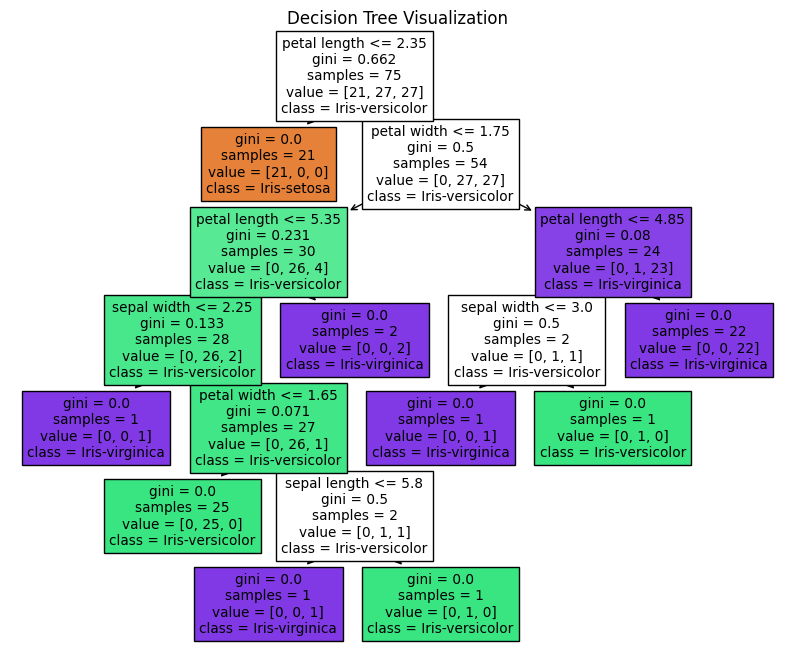

Classifier: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




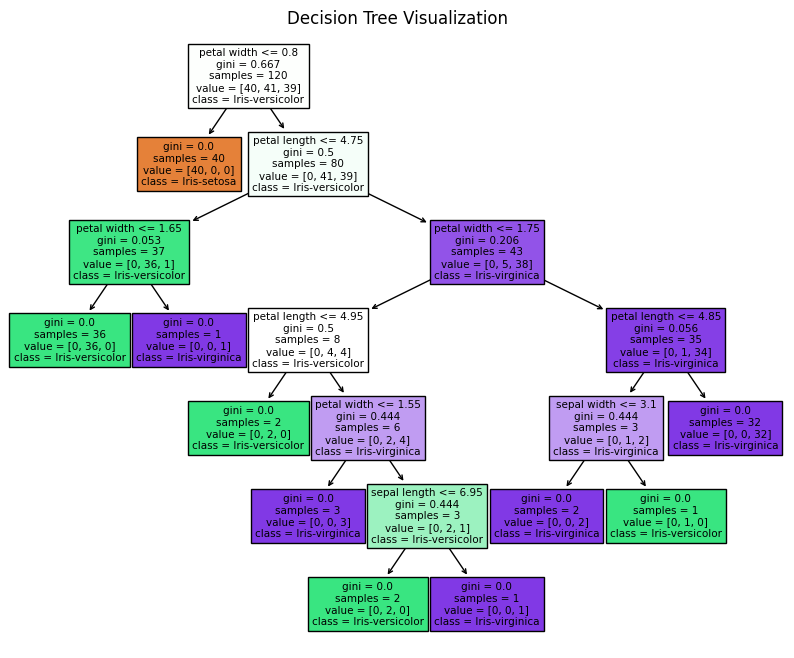

In [35]:
class Classifier:
    def __init__(self, name, accuracy, confusion_matrix, report):
        self.name = name
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.report = report

    def __str__(self):
        return f"Classifier: {self.name}\nAccuracy: {self.accuracy:.2f}\nConfusion Matrix:\n{self.confusion_matrix}\nReport:\n{self.report}\n"

def load_data():
    iris = fetch_ucirepo(id=53)
    X = iris.data.features
    y = iris.data.targets
    return X, y

def train_and_evaluate_model(X_train, y_train, X_test, y_test, model_name):
    if model_name == 'Decision Tree':
        model = tree.DecisionTreeClassifier()
    elif model_name == 'Naïve Bayes':
        model = GaussianNB()

    model.fit(X_train, y_train.to_numpy().ravel())
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return Classifier(model_name, accuracy, cm, report), model

def plot_decision_tree(model, feature_names, class_names):
    plt.figure(figsize=(10, 8))
    tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title('Decision Tree Visualization')
    plt.show()

# Load data
X, y = load_data()

# Split the data
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5, random_state=42)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the Decision Tree model for 50/50
iris_tree_5050, decision_tree_model_5050 = train_and_evaluate_model(x_train50, y_train50, x_test50, y_test50, 'Decision Tree')

# Print results for 50/50
print(iris_tree_5050)

# Visualize the decision tree for 50/50
plot_decision_tree(decision_tree_model_5050, iris.data.headers, np.unique(y))

# Train and evaluate the Decision Tree model for 80/20
iris_tree_8020, decision_tree_model_8020 = train_and_evaluate_model(x_train80, y_train80, x_test20, y_test20, 'Decision Tree')

# Print results for 80/20
print(iris_tree_8020)

# Visualize the decision tree for 80/20
plot_decision_tree(decision_tree_model_8020, iris.data.headers, np.unique(y))


# **Naive Bayes**

1. 50/50
2. 80/20

In [37]:
# Train and evaluate the Naïve Bayes model for 50/50
model_bayes_5050 = GaussianNB()
model_bayes_5050.fit(x_train50, y_train50.to_numpy().ravel())
y_pred_bayes_5050 = model_bayes_5050.predict(x_test50)

# Calculate metrics
iris_bayes_5050 = Classifier(
    'Naive Bayes 50/50',
    accuracy_score(y_test50, y_pred_bayes_5050),
    confusion_matrix(y_test50, y_pred_bayes_5050),
    classification_report(y_test50, y_pred_bayes_5050)
)

# Print results for 50/50
print(iris_bayes_5050)

# Train and evaluate the Naïve Bayes model for 80/20
model_bayes_8020 = GaussianNB()
model_bayes_8020.fit(x_train80, y_train80.to_numpy().ravel())
y_pred_bayes_8020 = model_bayes_8020.predict(x_test20)

# Calculate metrics
iris_bayes_8020 = Classifier(
    'Naive Bayes 80/20',
    accuracy_score(y_test20, y_pred_bayes_8020),
    confusion_matrix(y_test20, y_pred_bayes_8020),
    classification_report(y_test20, y_pred_bayes_8020)
)

# Print results for 80/20
print(iris_bayes_8020)


Classifier: Naive Bayes 50/50
Accuracy: 0.99
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75


Classifier: Naive Bayes 80/20
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00 

**Wine Datasets**


---




In [45]:
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [46]:
# metadata
wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'published_in': 'Pattern Recognition',
  'year': 1994,
  'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdb

In [47]:
# variable information
wine.variables

x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)

#**Decision Tree**
1. 50/50
2. 80/20

Model: Decision Tree Wine 50/50
Accuracy: 0.91
Confusion Matrix:
[[28  1  2]
 [ 0 29  5]
 [ 0  0 24]]
Classification Report:
              precision    recall  f1-score    support
1              1.000000  0.903226  0.949153  31.000000
2              0.966667  0.852941  0.906250  34.000000
3              0.774194  1.000000  0.872727  24.000000
accuracy       0.910112  0.910112  0.910112   0.910112
macro avg      0.913620  0.918722  0.909377  89.000000
weighted avg   0.926374  0.910112  0.912154  89.000000


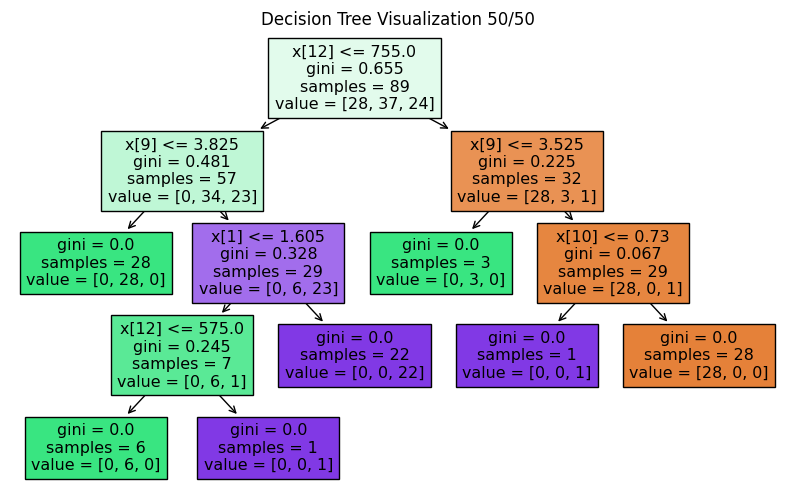


Model: Decision Tree Wine 80/20
Accuracy: 0.92
Confusion Matrix:
[[11  2  0]
 [ 0 16  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score    support
1              1.000000  0.846154  0.916667  13.000000
2              0.888889  0.941176  0.914286  17.000000
3              0.857143  1.000000  0.923077   6.000000
accuracy       0.916667  0.916667  0.916667   0.916667
macro avg      0.915344  0.929110  0.918010  36.000000
weighted avg   0.923721  0.916667  0.916611  36.000000


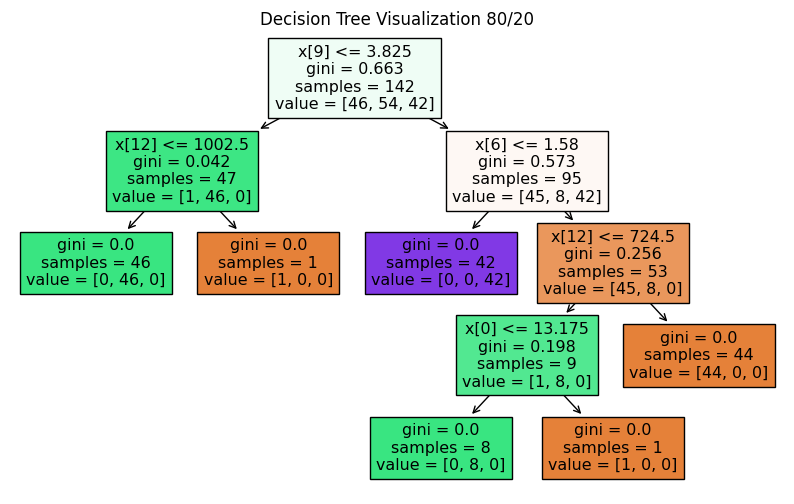

In [56]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Train and evaluate the Decision Tree model for 50/50
decision_tree_model_5050 = tree.DecisionTreeClassifier()
decision_tree_model_5050.fit(x_train50, y_train50)
y_pred_tree_5050 = decision_tree_model_5050.predict(x_test50)

# Calculate metrics for 50/50
wine_tree_5050 = {
    'model': 'Decision Tree Wine 50/50',
    'accuracy': accuracy_score(y_test50, y_pred_tree_5050),
    'confusion_matrix': confusion_matrix(y_test50, y_pred_tree_5050),
    'classification_report': classification_report(y_test50, y_pred_tree_5050, output_dict=True)
}

# Print results for 50/50
print(f"Model: {wine_tree_5050['model']}")
print(f"Accuracy: {wine_tree_5050['accuracy']:.2f}")
print("Confusion Matrix:")
print(wine_tree_5050['confusion_matrix'])
print("Classification Report:")
print(pd.DataFrame(wine_tree_5050['classification_report']).transpose())

# Plot the decision tree for 50/50
plt.figure(figsize=(10, 6))  # Smaller size
tree.plot_tree(decision_tree_model_5050,
               feature_names=wine.data.feature_names,
               class_names=wine.data.target_names,
               filled=True)
plt.title('Decision Tree Visualization 50/50')
plt.show()

# Train and evaluate the Decision Tree model for 80/20
decision_tree_model_8020 = tree.DecisionTreeClassifier()
decision_tree_model_8020.fit(x_train80, y_train80)
y_pred_tree_8020 = decision_tree_model_8020.predict(x_test20)

# Calculate metrics for 80/20
wine_tree_8020 = {
    'model': 'Decision Tree Wine 80/20',
    'accuracy': accuracy_score(y_test20, y_pred_tree_8020),
    'confusion_matrix': confusion_matrix(y_test20, y_pred_tree_8020),
    'classification_report': classification_report(y_test20, y_pred_tree_8020, output_dict=True)
}

# Print results for 80/20
print(f"\nModel: {wine_tree_8020['model']}")
print(f"Accuracy: {wine_tree_8020['accuracy']:.2f}")
print("Confusion Matrix:")
print(wine_tree_8020['confusion_matrix'])
print("Classification Report:")
print(pd.DataFrame(wine_tree_8020['classification_report']).transpose())

# Plot the decision tree for 80/20
plt.figure(figsize=(10, 6))  # Smaller size
tree.plot_tree(decision_tree_model_8020,
               feature_names=wine.data.feature_names,
               class_names=wine.data.target_names,
               filled=True)
plt.title('Decision Tree Visualization 80/20')
plt.show()



#**Naive Bayes**

1. 50/50

2. 80/20


In [55]:
from sklearn.naive_bayes import GaussianNB

# Train and evaluate the Naïve Bayes model for 50/50
nb_model_5050 = GaussianNB()
nb_model_5050.fit(x_train50, y_train50)
y_pred_nb_5050 = nb_model_5050.predict(x_test50)

# Calculate metrics for 50/50
wine_nb_5050 = {
    'model': 'Naïve Bayes Wine 50/50',
    'accuracy': accuracy_score(y_test50, y_pred_nb_5050),
    'confusion_matrix': confusion_matrix(y_test50, y_pred_nb_5050),
    'classification_report': classification_report(y_test50, y_pred_nb_5050, output_dict=True)
}

# Print results for 50/50
print(f"Model: {wine_nb_5050['model']}")
print(f"Accuracy: {wine_nb_5050['accuracy']:.2f}")
print("Confusion Matrix:")
print(wine_nb_5050['confusion_matrix'])
print("Classification Report:")
print(pd.DataFrame(wine_nb_5050['classification_report']).transpose())

# Train and evaluate the Naïve Bayes model for 80/20
nb_model_8020 = GaussianNB()
nb_model_8020.fit(x_train80, y_train80)
y_pred_nb_8020 = nb_model_8020.predict(x_test20)

# Calculate metrics for 80/20
wine_nb_8020 = {
    'model': 'Naïve Bayes Wine 80/20',
    'accuracy': accuracy_score(y_test20, y_pred_nb_8020),
    'confusion_matrix': confusion_matrix(y_test20, y_pred_nb_8020),
    'classification_report': classification_report(y_test20, y_pred_nb_8020, output_dict=True)
}

# Print results for 80/20
print(f"\nModel: {wine_nb_8020['model']}")
print(f"Accuracy: {wine_nb_8020['accuracy']:.2f}")
print("Confusion Matrix:")
print(wine_nb_8020['confusion_matrix'])
print("Classification Report:")
print(pd.DataFrame(wine_nb_8020['classification_report']).transpose())


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Naïve Bayes Wine 50/50
Accuracy: 0.96
Confusion Matrix:
[[29  2  0]
 [ 1 32  1]
 [ 0  0 24]]
Classification Report:
              precision    recall  f1-score    support
1              0.966667  0.935484  0.950820  31.000000
2              0.941176  0.941176  0.941176  34.000000
3              0.960000  1.000000  0.979592  24.000000
accuracy       0.955056  0.955056  0.955056   0.955056
macro avg      0.955948  0.958887  0.957196  89.000000
weighted avg   0.955131  0.955056  0.954895  89.000000

Model: Naïve Bayes Wine 80/20
Accuracy: 0.97
Confusion Matrix:
[[12  1  0]
 [ 0 17  0]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score    support
1              1.000000  0.923077  0.960000  13.000000
2              0.944444  1.000000  0.971429  17.000000
3              1.000000  1.000000  1.000000   6.000000
accuracy       0.972222  0.972222  0.972222   0.972222
macro avg      0.981481  0.974359  0.977143  36.000000
weighted avg   0.973765  0.972222  0.9

# **Conclusion**


For the Iris dataset, the Naïve Bayes model performs consistently well across both the 50/50 and 80/20 splits, with high accuracy in both cases. The model’s simplicity aligns well with the structure of the Iris data, resulting in minimal misclassifications. As with the Wine dataset, the 80/20 split yields slightly better results due to the larger training set. Overall, Naïve Bayes proves to be an effective and stable classifier for this dataset, handling the task with ease and producing reliable outcomes.

In comparing the performance of the Naïve Bayes model on the Wine dataset using two different training/test splits (50/50 and 80/20), the results reveal slight variations in accuracy, but both configurations perform reasonably well. The confusion matrices provide a detailed view of the model’s classification ability, showing that most of the predictions are accurate, with few misclassifications. The 80/20 split, having a larger training set, tends to yield slightly better accuracy as expected due to the model being trained on more data, while the 50/50 split offers a balanced approach for both training and evaluation.


# **References**

Professor's classes and provided material